### Questions
1. How many passengers were traveling and how many got survived or how many got died?
2. What factors made people more likely to survive?
    2. Age
    2. Sex
    2. Class
    2. Port of Embarkation

In [1]:
#load the required packages

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Load the data frame

df = pd.read_csv('titanic-data.csv')

## Data Wrangling

In [3]:
# check how many rows and columns are there in the data set

df.shape

(891, 12)

In [4]:
# preview the data

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# check the data types of variables in the data frame

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The passengerId variable is not required for further calculations so it can be deleted from the data frame. Variables like Survived, Pclass, Sex and Embarked are categorical variables but we can see that they are not interpreted properly. We can convert these variables to their appropriate types.

In [7]:
# delete passenger id variable
del df['PassengerId']

In [8]:
# converting object data type to category

df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [9]:
# verify the conversion.

df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object

In [10]:
# summary statistic
df.describe()

C:\Users\157741\Documents\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,7.910400
50%,NaN,0.000000,0.000000,14.454200
75%,NaN,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In age column clearly the count is 714 that means 177 (891-714) passenger's age is missing.

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
df.Pclass.describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

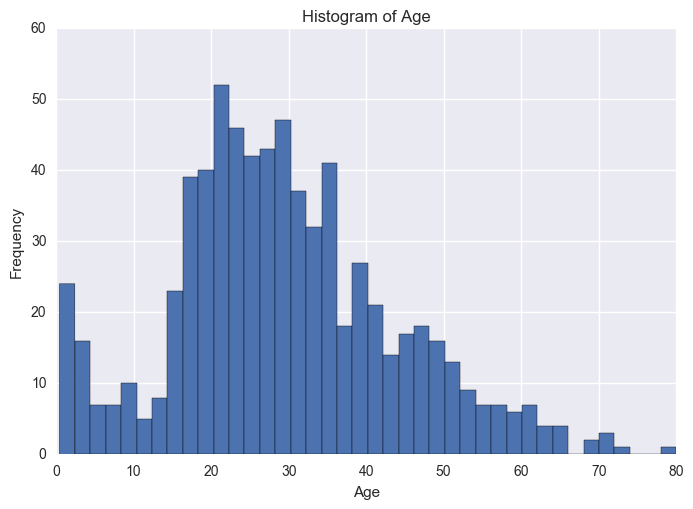

In [13]:
df.Age.plot(kind = 'hist', bins = 40, title = 'Histogram of Age')
plt.xlabel('Age')

In [14]:
df.Age.median()

28.0

The median for the age is 28. From above histogram we can say that most of the people lie in the range of 20 to 30 years category. The distribution is also positively skewed. So mean will not be appropriate stastic to fill the empty values as it is  affected by outliers. The empty cells in Age column can be replaced by the age of 28 (median) on safer side. 

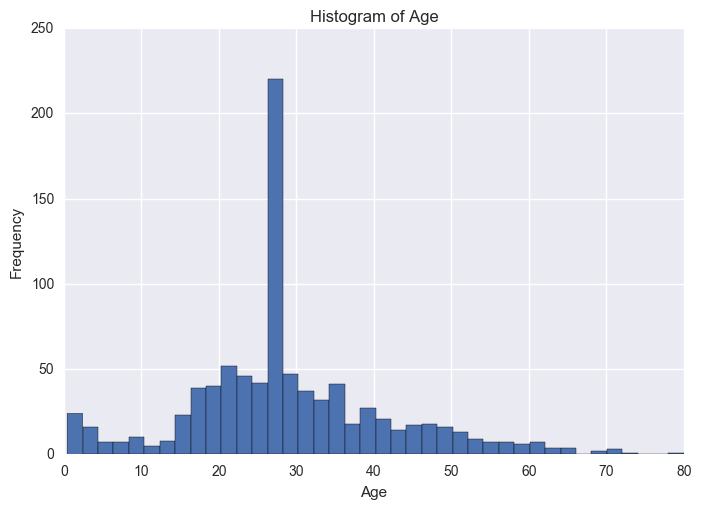

In [15]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.Age.plot(kind = 'hist', bins = 40, title = 'Histogram of Age')
plt.xlabel('Age')

We can see the peak at the age 28. As 177 blanks are filled with median of the age.

In [16]:
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208
std,13.019697,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


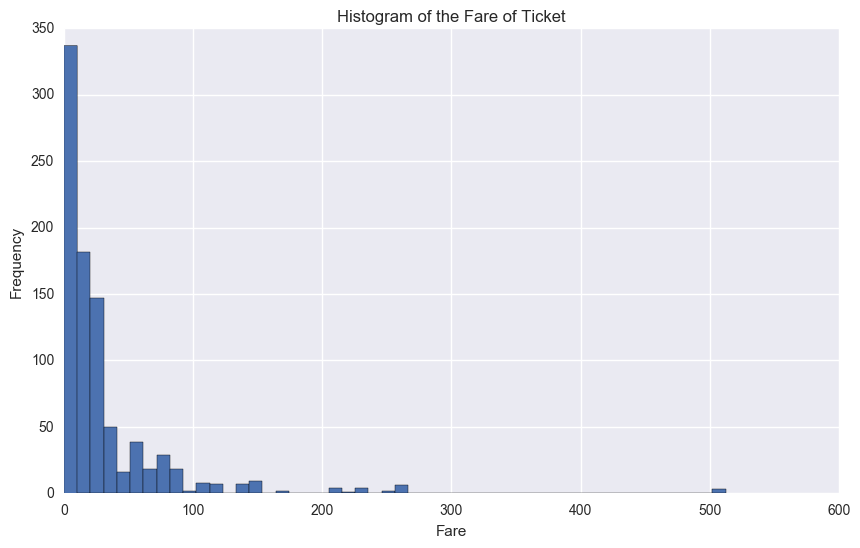

In [18]:
df.Fare.plot(kind = "hist", bins = 50, figsize = (10,6), title = 'Histogram of the Fare of Ticket')
plt.xlabel('Fare')

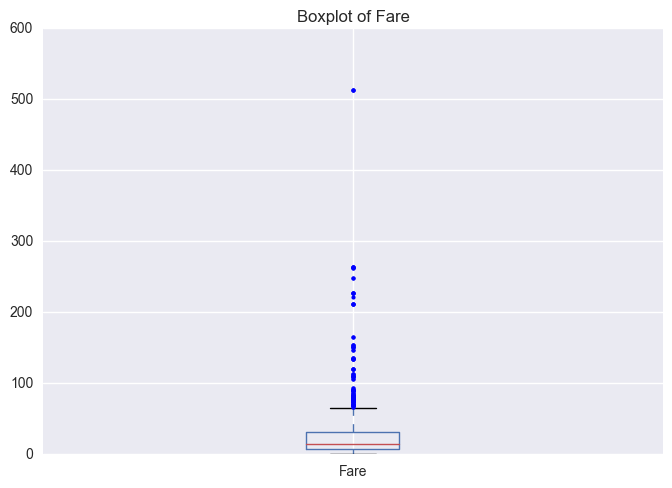

In [19]:
df.Fare.plot(kind = "box", sym='y.', title = 'Boxplot of Fare')

In [20]:
# Examining the outliers in the Fare column

max_fare = df.Fare.max()
max_fare_rows = df[df.Fare == max_fare]
max_fare_rows


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


We can see these outliers can not be deleted as these passengers are traveling on same ticket. We will keep these records.

In [21]:
# examining the cabin data

df.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [22]:
df.Cabin.isnull().sum()

687

We can see that 687 data records are missing. It will be difficult relate Cabin data with the Survival data as most of the
records are missing for now let's delete this variable from the data frame.

In [23]:
del df['Cabin']
df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked    category
dtype: object

In [24]:
# Examining the Ticket Variable

df.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

We can see that there 681 unique records of the tickets. Let's keep this data as of now.

In [25]:
# Examining the Embarked Variable

df.Embarked.isnull().sum()



2

We can see that there two passengers whose port of Embarkation is not availabel in the dataframe.

In [26]:
# Rows with missing port of embarkation

df[df.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


There are two passenger traveling on same ticket belongs to class 1 and got survived in the tragedy.

In [27]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df.groupby(['Embarked','Pclass']).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

Since most of the passengers Embarked at 'S' let's assign Port of embarkation 'S' to these two passengers

In [29]:
# fill missing value in Embarked variable with 'S'

df['Embarked'].fillna('S', inplace=True)

In [30]:
# Verify the port of emabarkation variable

df.Embarked.isnull().sum()

0

## Data Exploration
### Number of passenger traveling, survived and died

In [31]:
# Calculate no of passenger traveling, survived and died

total_people_traveling = len(df['Survived'])
no_of_people_died = df[df.Survived == 0].Survived.count()
percentage_of_people_died = round(no_of_people_died * 100 / total_people_traveling, 2)
no_of_people_survived = df[df.Survived == 1].Survived.count()
percentage_of_people_survived = round(no_of_people_survived * 100 / total_people_traveling, 2)

# Survival Statistics

print("Total No of Passengers Traveling: %d " %(total_people_traveling))
print("No of Passengers Died : %d (%.2f%%)" %(no_of_people_died, percentage_of_people_died))
print("No of Passengers Survived: %d (%.2f%%)" %(no_of_people_survived, percentage_of_people_survived))


Total No of Passengers Traveling: 891 
No of Passengers Died : 549 (61.62%)
No of Passengers Survived: 342 (38.38%)


In [32]:
def cross_tab(rows, column, margins = True, normalize = False): 
    """Return the cross table of the given variables."""
    cross_table = pd.crosstab(index = rows, columns = column, margins = margins, normalize = normalize)
    if margins == True:
        cross_table.index= ["Died","Survived", "Total"]   
    else:
        cross_table.index= ["Died","Survived"]     
    return cross_table
    

In [33]:
def horizontal_barplot(varx, vary, title1, title2):
    """Return the barplot of the given variables."""

    fig = plt.figure(figsize=(18,6))

    ax1 = fig.add_subplot(121)
    cross_tab(varx, vary, margins = False).plot(kind = 'barh', stacked = True, ax = ax1,
                                                     title = title1)
    plt.xlabel('Count, #')
    
    ax2 = fig.add_subplot(122)

    (cross_tab(varx, vary, margins = False, normalize = True) * 100).plot(kind = 'barh', stacked = True, ax = ax2,
                                                     title = title2)
    
    plt.xlabel('Percetange, %')
    

### Passengers survived conditioned on Sex

In [34]:
# Frequency table for passengers survived and died conditioned on Sex

cross_tab(df.Survived, df.Sex)

Sex,female,male,All
Died,81,468,549
Survived,233,109,342
Total,314,577,891


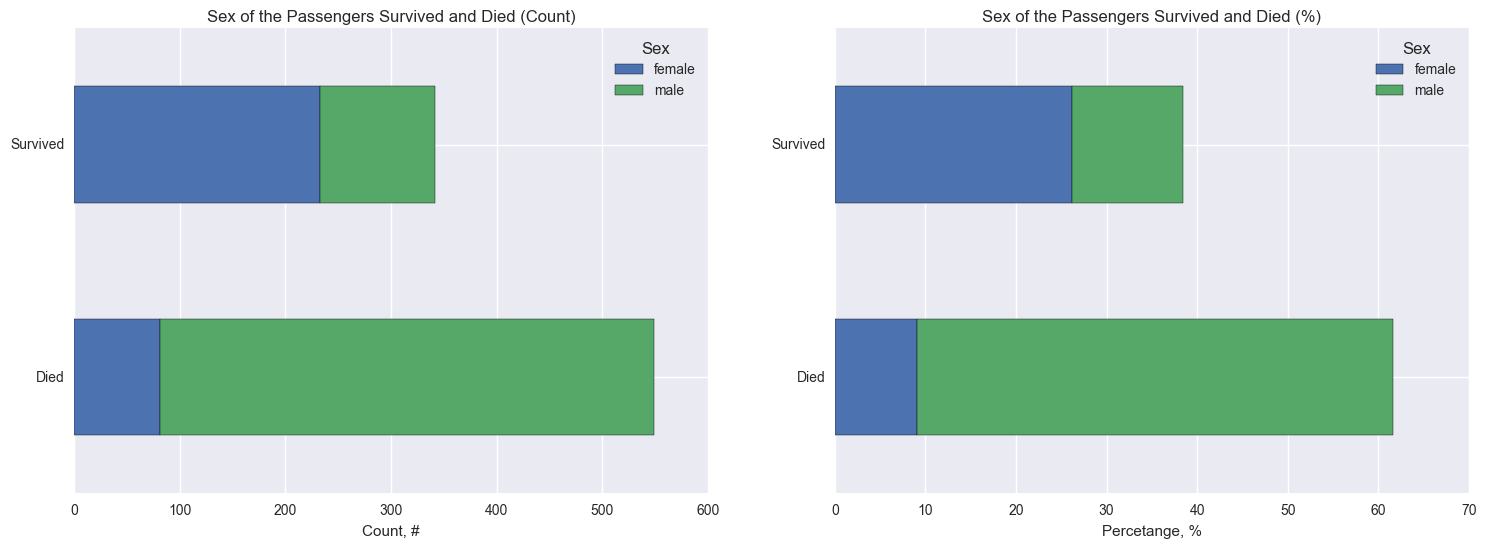

In [35]:
horizontal_barplot(df.Survived, df.Sex, "Sex of the Passengers Survived and Died (Count)", 
            "Sex of the Passengers Survived and Died (%)")

From the frequency table and the plot we can see that there more number of females survived than males.

### Passengers survived and died conditioned Class of Travel

In [36]:
# Frequency table for passengers survived and died conditioned on Class of  the passenger

cross_tab(df.Survived, df.Pclass)

Pclass,1,2,3,All
Died,80,97,372,549
Survived,136,87,119,342
Total,216,184,491,891


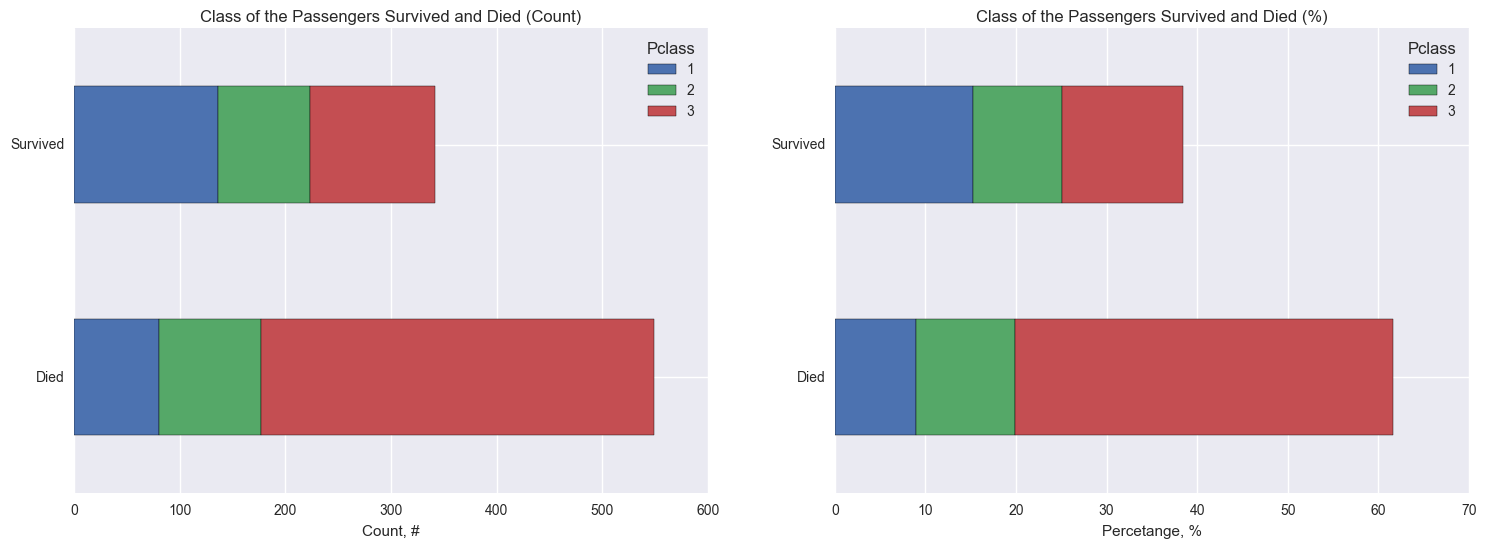

In [37]:
# Horizontal Bar Plot for people from different class

horizontal_barplot(df.Survived, df.Pclass, "Class of the Passengers Survived and Died (Count)", 
            "Class of the Passengers Survived and Died (%)")

We can see that more passengers from upper class got survived than other two classes.

### Passengers survived and died conditioned Port of Embarkation

In [38]:
# Frequency table for passengers survived and died conditioned on Class of  the passenger

cross_tab(df.Survived, df.Embarked)

Embarked,C,Q,S,All
Died,75,47,427,549
Survived,93,30,219,342
Total,168,77,646,891


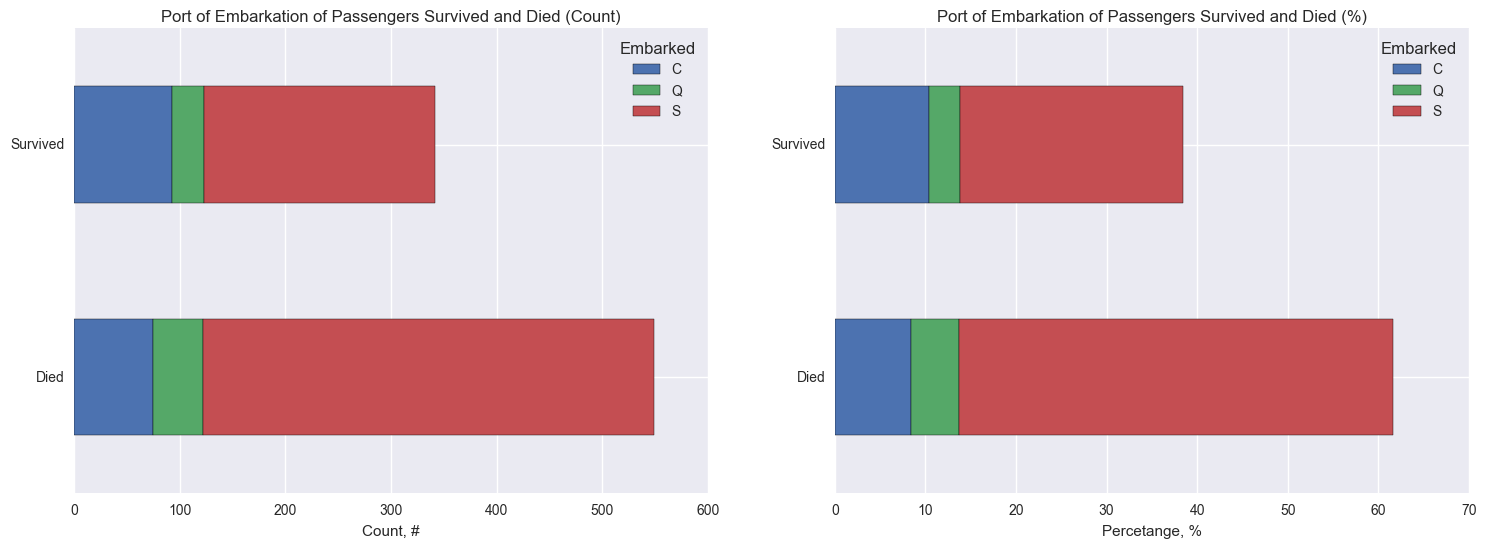

In [39]:
# Horizontal Bar Plot for people from different Port of Embarkation 

horizontal_barplot(df.Survived, df.Embarked, "Port of Embarkation of Passengers Survived and Died (Count)", 
            "Port of Embarkation of Passengers Survived and Died (%)")

There seem to be no relation with survival of the passengers with the port of embarkation.

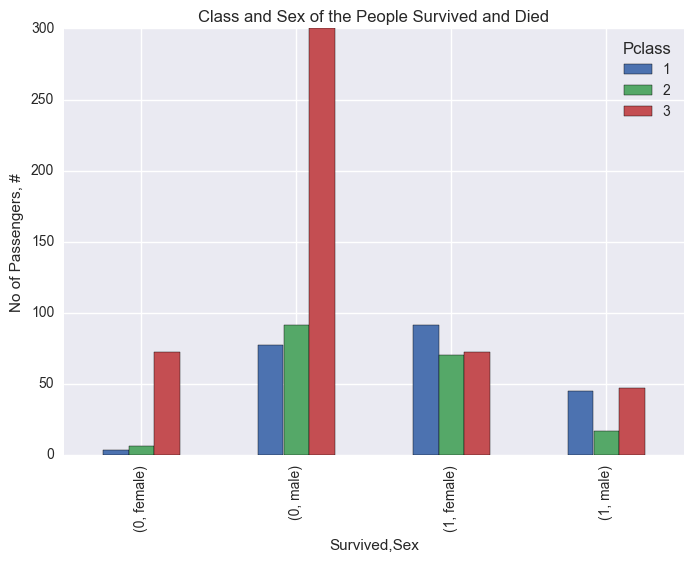

In [40]:
p = df.groupby(['Survived','Sex','Pclass']).size()

p = p.unstack()

p = p.plot(kind = 'bar', title = "Class and Sex of the People Survived and Died")

plt.ylabel('No of Passengers, #')

We can see from above plot that the females from upper class (i.e. class 1) got survived. It is clear that higher class males and females were given preference. Most of the Lower class males could not survive.

In [41]:
# create new variable of Age Groups.

bins = np.arange(0, 90, 10)
age_groups = pd.cut(df.Age, bins = bins)
df['Age_Groups'] = age_groups
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Groups
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(20, 30]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(30, 40]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(20, 30]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(30, 40]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(30, 40]"


In [42]:
# % table for passengers survived and died conditioned on Age Groups

round(cross_tab(df.Survived, df.Age_Groups, normalize = True) * 100, 2)

Age_Groups,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]",All
Died,2.92,7.97,30.42,9.65,5.95,2.81,1.46,0.45,61.62
Survived,4.26,4.94,15.26,7.74,3.70,1.91,0.45,0.11,38.38
Total,7.18,12.91,45.68,17.40,9.65,4.71,1.91,0.56,100.00


We can see that the passengers with lower age were more likely to survive.

## Conclusion

1. In RMS Titanic there were approximately 1317 (Source: Wikipedia) passengers were traveling; we have data for only 891 passengers. So conclusions are based on only available data.

2. Almost 62% passengers could not survive the disaster.

3. Females and Children were given priority of evacuation over the rest of the passengers.

4. First class passengers especially females had more chance of survival than passengers from other class of travel

5. There seem to be no correlation of survival with the port of embarkation.

6. In the data set provided the information about the crew is missing. The data could have thrown light on behaviour and role of crew members in such disasters.

7. The age data for many passengers is missing.
